In [13]:
import numpy as np
import astropy.units as u
import astropy.constants as const
from astropy.visualization import quantity_support
quantity_support()

import matplotlib.pyplot as plt

In [12]:
%config InlineBackend.figure_format = "retina"

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 18

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [6]:
def eos(P, rho_0=1.46 * u.g / u.cm**3, K=3.11e-6 * u.g / u.cm**3, n=0.513):
    return rho_0 + K * u.Pa**(-n) * P**n

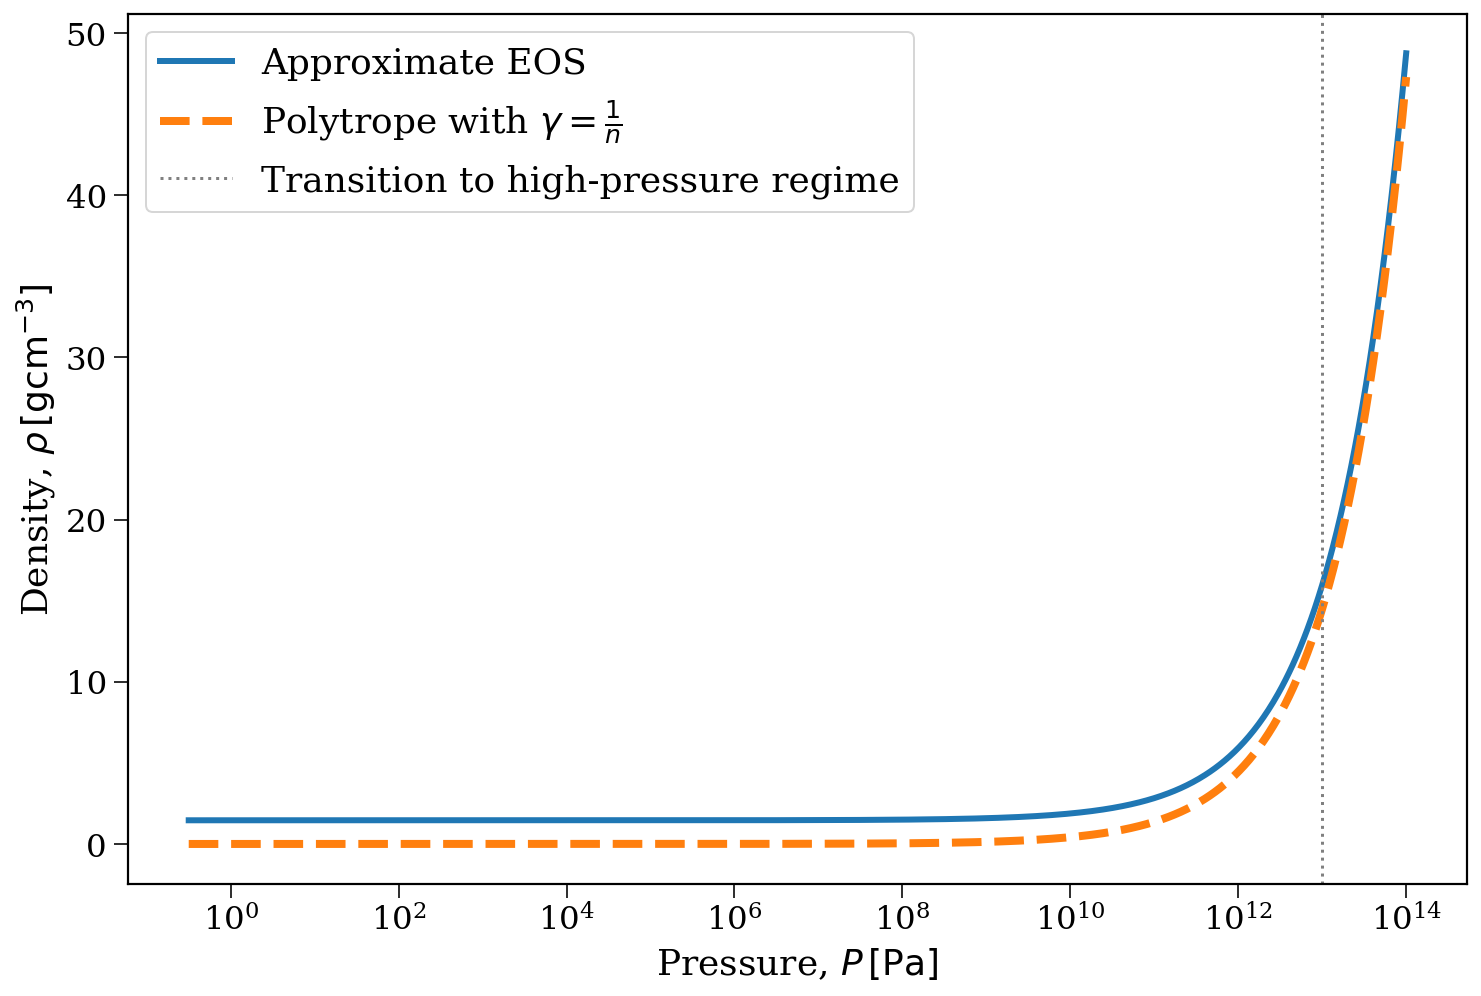

In [136]:
fig, ax = plt.subplots()

pressure_range = np.logspace(-0.5, 14, 1000) * u.Pa

ax.semilogx(pressure_range, eos(pressure_range), lw=3, label="Approximate EOS")
ax.semilogx(pressure_range, eos(pressure_range, rho_0=0 * u.g / u.cm**3), lw=4,
            linestyle="--", label=r"Polytrope with $\gamma=\frac{1}{n}$")

ax.axvline(1e13, color="grey", linestyle="dotted", label="Transition to high-pressure regime")

ax.legend()

ax.set_xlabel(r"Pressure, $P \, [\rm Pa]$")
ax.set_ylabel(r"Density, $\rho \, [\rm g cm^{-3}]$")

plt.show()